# CFM 301 Data Assignment 1 Q3b

Jeongseop Yi (j22yi / 20727267)

In [24]:
import pandas as pd
from pandasql import sqldf
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import linear_model
import statsmodels.api as sm

In [25]:
amzn_data = pd.read_csv("../csv/amazon.csv")
amzn_data.columns = map(str.lower, amzn_data.columns)

ff_factors = pd.read_csv("../csv/ff_factors.csv")
ff_factors.columns = map(str.lower, ff_factors.columns)

ff_factors["dateff"] = pd.to_datetime(ff_factors["dateff"], format='%Y%m%d')
ff_factors["yyyymm"] = ff_factors.dateff.dt.year*100 + ff_factors.dateff.dt.month
ff_factors["monthid"] = (ff_factors.dateff.dt.year-2000)*12 + ff_factors.dateff.dt.month

amzn_data["date"] = pd.to_datetime(amzn_data["date"], format='%Y%m%d')
amzn_data["yyyymm"] = amzn_data.date.dt.year*100 + amzn_data.date.dt.month
amzn_data["monthid"] = (amzn_data.date.dt.year-2000)*12 + amzn_data.date.dt.month

In [26]:
ret_matrix = pd.merge(amzn_data, ff_factors, on="monthid")
ret_matrix["xret"] = ret_matrix["ret"] - ret_matrix["rf"]
ret_matrix["xvwretd"] = ret_matrix["vwretd"] - ret_matrix["rf"]

In [27]:
OLS_data = {'permno':[], 'date':[], 'yyyymm':[], 'monthid':[], 'alpha': [], 'beta-xvwretd': [], 'beta-smb': [], 'beta-hml': [], 't-alpha': [], 't-beta-xvwretd':[], 't-beta-smb':[], 't-beta-hml':[]}

for x in range(61, len(ret_matrix.index) + 1):
    cur_ret = pd.DataFrame(ret_matrix[x-60:x])
    explanatory_variates = cur_ret[["xvwretd", "smb", "hml"]]
    excess_ret = cur_ret['xret']
    k = sm.add_constant(explanatory_variates)
    model = sm.OLS(excess_ret, k).fit()

    OLS_data['permno'].append(cur_ret['permno'].iloc[0])
    OLS_data['date'].append(cur_ret['date'].iloc[59])
    OLS_data['yyyymm'].append(cur_ret['yyyymm_x'].iloc[59])
    OLS_data['monthid'].append(cur_ret['monthid'].iloc[59])

    OLS_data['alpha'].append(model.params['const'])
    OLS_data['beta-xvwretd'].append(model.params['xvwretd'])
    OLS_data['beta-smb'].append(model.params['smb'])
    OLS_data['beta-hml'].append(model.params['hml'])
    
    OLS_data['t-alpha'].append(model.tvalues['const'])
    OLS_data['t-beta-xvwretd'].append(model.tvalues['xvwretd'])
    OLS_data['t-beta-smb'].append(model.tvalues['smb'])
    OLS_data['t-beta-hml'].append(model.tvalues['hml'])

OLS_data = pd.DataFrame(OLS_data)

In [28]:
print(OLS_data[['yyyymm', 'alpha', 'beta-xvwretd', 'beta-smb', 'beta-hml', 't-alpha', 't-beta-xvwretd', 't-beta-smb', 't-beta-hml']])

     yyyymm     alpha  beta-xvwretd  beta-smb  beta-hml   t-alpha  \
0    200501  0.028653      2.182980 -0.228022 -0.956735  1.253835   
1    200502  0.025682      2.110946 -0.073661 -0.996168  1.105304   
2    200503  0.028597      2.224784 -0.320933 -0.965296  1.229317   
3    200504  0.027834      2.230115 -0.305537 -0.937685  1.211846   
4    200505  0.028455      2.225263 -0.337172 -0.937064  1.232209   
..      ...       ...           ...       ...       ...       ...   
199  202108  0.004492      1.365669 -0.443805 -0.938776  0.592194   
200  202109  0.004537      1.346956 -0.475990 -0.890195  0.613812   
201  202110  0.004180      1.296697 -0.426977 -0.877600  0.548188   
202  202111  0.005485      1.283084 -0.426446 -0.860427  0.711817   
203  202112  0.004086      1.269650 -0.378772 -0.902845  0.520400   

     t-beta-xvwretd  t-beta-smb  t-beta-hml  
0          4.676666   -0.460506   -1.469725  
1          4.431894   -0.131406   -1.497962  
2          4.456877   -0.492125  

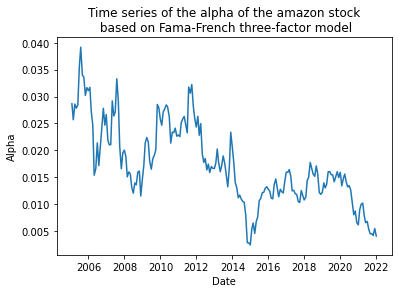

In [29]:
alpha_series = sns.lineplot(x = "date", y = "alpha", data = OLS_data)
plt.xlabel("Date")
plt.ylabel("Alpha")
plt.title("Time series of the alpha of the amazon stock\n based on Fama-French three-factor model")
plt.show(alpha_series)

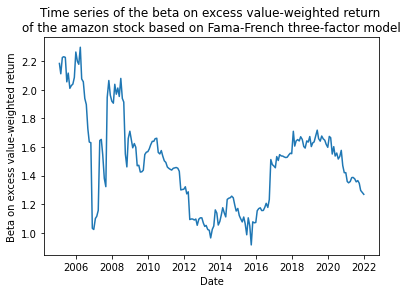

In [30]:
beta_xvwretd_series = sns.lineplot(x = "date", y = "beta-xvwretd", data = OLS_data)
plt.xlabel("Date")
plt.ylabel("Beta on excess value-weighted return")
plt.title("Time series of the beta on excess value-weighted return \nof the amazon stock based on Fama-French three-factor model")
plt.show(beta_xvwretd_series)

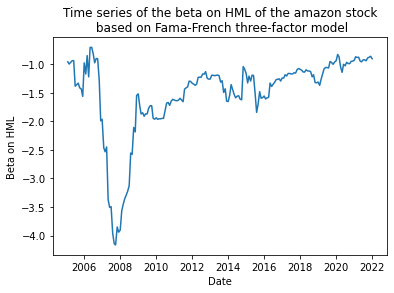

In [31]:
beta_hml_series = sns.lineplot(x = "date", y = "beta-hml", data = OLS_data)
plt.xlabel("Date")
plt.ylabel("Beta on HML")
plt.title("Time series of the beta on HML of the amazon stock\n based on Fama-French three-factor model")
plt.show(beta_hml_series)

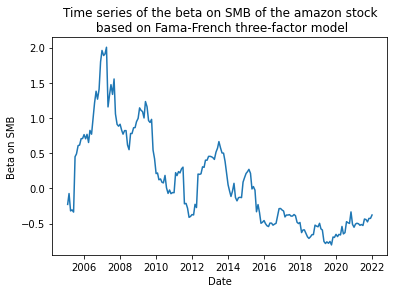

In [32]:
beta_smb_series = sns.lineplot(x = "date", y = "beta-smb", data = OLS_data)
plt.xlabel("Date")
plt.ylabel("Beta on SMB")
plt.title("Time series of the beta on SMB of the amazon stock\n based on Fama-French three-factor model")
plt.show(beta_smb_series)

In [33]:
OLS_data = pd.DataFrame(OLS_data).sort_values(['yyyymm'])
with pd.ExcelWriter("../xlsx/2b3b.xlsx", mode='a', engine="openpyxl", if_sheet_exists='replace') as writer:
    OLS_data.to_excel(writer, sheet_name="3b")